# Moleculas (usando PARSEC)

Nicolas Unger

In [158]:
import numpy as np
import matplotlib.pyplot as plt

## Voy a usar la molecula de Fluor: $F_2$

### Usando PARSEC calculo la energia para distintas distancias entre los atomos

Hice un script de python que corra PARSEC para distintas distancias entre los atomos desde 0.6 au hasta 8 au

In [159]:
pos, energias = np.loadtxt("/home/nunger/Documents/E3/parsec/energias.txt",delimiter=",")
pos = pos*2

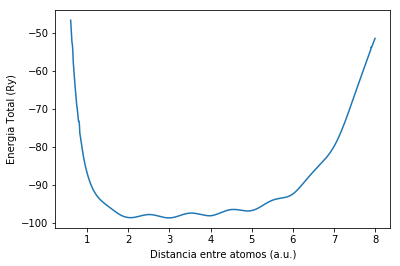

In [160]:
plt.plot(pos,energias)
plt.xlabel("Distancia entre atomos (a.u.)")
plt.ylabel("Energia Total (Ry)")
plt.show()

## Diagonalizo el Hamiltoniano con el potencial que obtuve

In [161]:
from numpy import diag,  linspace, array ,arange
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show
from numpy import pi,sqrt,zeros,sin,cos

    
%matplotlib inline

import time
from __future__ import division

In [162]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [163]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [164]:
from numpy import diag,  linspace, array, arange, zeros
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

xmin = pos[0]
xmax = pos[-1]
nsize = len(pos)

T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Kinetic (T) and Potential (V)
M = 18.998 * 1836 * 2

T = (-0.5/M)*Laplacian(pos)
V = energias

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)


# Normalization
U=Normalizate(U,pos)

E0 = -98.6568011326
E1 = -98.6400649816
E2 = -98.6237091072
E3 = -98.6078713903
E4 = -98.5942837888
E5 = -98.5922855892
E6 = -98.5769793243
E7 = -98.5765510819


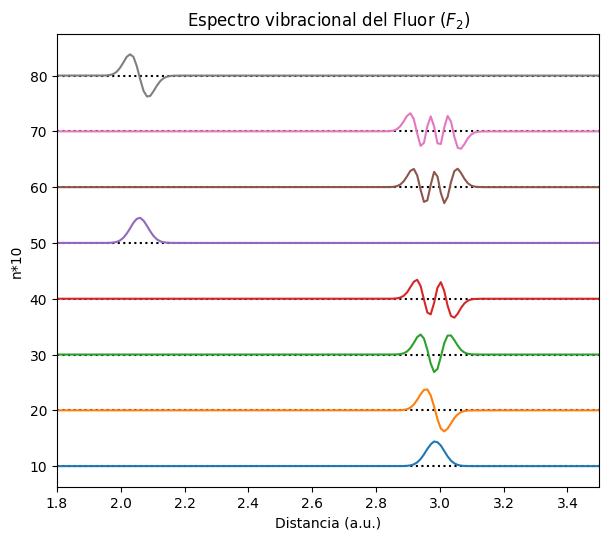

In [179]:
# Plot

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 8

# Plot the potential
#plot(pos,V,color='k')

# Plot wavefunctions
ebase=0
for i in range(nfunctions):
    ebase=ebase+10
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(pos,U[:,i]+ebase)
    print("E{} = {}".format(i,E[i]))
#axis([xmin,xmax,1,6])
plt.xlim([1.8, 3.5])
title("Espectro vibracional del Fluor ($F_2$)")
xlabel("Distancia (a.u.)")
ylabel("n*10")
show()

### Encuentro las posiciones de equilibrio

In [166]:
from scipy.optimize import curve_fit

In [167]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

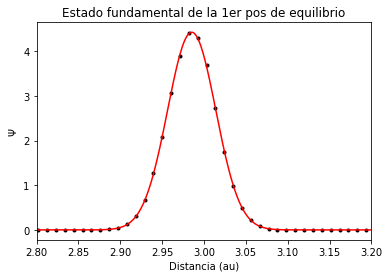

In [176]:
# Ajusto una gaussiana para sacar el punto de equilibrio del estado fundamental

p0 = [4., 3., 1.] # Parametros iniciales del fiteo gaussiano
coeff, var_matrix = curve_fit(gauss, pos, U[:,0], p0=p0)

x_fit = np.linspace(2.8,3.2,500)
gauss_fit = gauss(x_fit,*coeff)

plt.plot(pos,U[:,0],'k.')
plt.plot(x_fit,gauss_fit,'r')
plt.xlim([2.8, 3.2])
plt.xlabel("Distancia (au)")
plt.ylabel("$\Psi$")
plt.title("Estado fundamental de la 1er pos de equilibrio")
plt.show()

In [169]:
print "1era Posicion de Equilibrio: {}".format(coeff[1])
print "Desviacion estandar: {}".format(coeff[2])

1era Posicion de Equilibrio: 2.98533257064
Desviacion estandar: -0.0287660486054


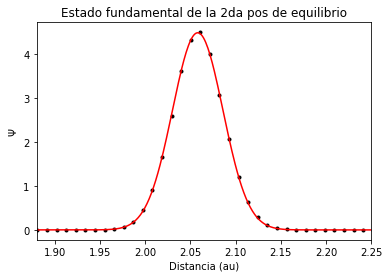

In [178]:
# Ajusto una gaussiana para sacar el otro punto de equilibrio

p1 = [4., 2., 1.] # Parametros iniciales del fiteo gaussiano
coeff2, var_matrix2 = curve_fit(gauss, pos, U[:,4], p0=p1)

x_fit2 = np.linspace(1.8,2.4,500)
gauss_fit2 = gauss(x_fit2,*coeff2)

plt.plot(pos,U[:,4],'k.')
plt.plot(x_fit2,gauss_fit2,'r')
plt.xlim([1.88, 2.25])
plt.xlabel("Distancia (au)")
plt.ylabel("$\Psi$")
plt.title("Estado fundamental de la 2da pos de equilibrio")
plt.show()

In [171]:
print "2da Posicion de Equilibrio: {}".format(coeff2[1])
print "Desviacion estandar: {}".format(coeff2[2])

2da Posicion de Equilibrio: 2.05808237285
Desviacion estandar: 0.0279214981432


### El momento dipolar da 0 porque no es una molecula polar

## Afinidad y energia de ionizacion

Para calcular la afinidad, le digo a PARSEC que agregue un electron y comparo la energia resultante con la molecula neutra.

Para la energia de ionizacion es lo mismo pero al reves.

In [172]:
# Afinididad

E_neutro = E[0]
E_mas = -97.541
E_aff = E_mas - E_neutro
print "La afinidad del Fluor es: {:.3f} Ry = {:.3f} eV".format(E_aff, E_aff*13.6057)

La afinidad del Fluor es: 1.116 Ry = 15.181 eV


In [173]:
# Ionizacion

E_menos = -98.646
E_ion = E_menos - E_neutro
print "La energia de ionizacion del Fluor es: {:.3f} Ry = {:.3f} eV".format(E_ion, E_ion*13.6057)

La energia de ionizacion del Fluor es: 0.011 Ry = 0.147 eV
